# Author: Guo Yuxi

In [4]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import pandas as pd
import torch
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


csv_file = "./local_data/collected_content.csv"
df = pd.read_csv(csv_file,encoding='gbk')

y = df.iloc[:,1]
print(y)

0       faculty
1       faculty
2       faculty
3       faculty
4       faculty
         ...   
8343      staff
8344      staff
8345      staff
8346      staff
8347      staff
Name: Class, Length: 8348, dtype: object


In [5]:
df

,University,Class,Content,Filename
0,cornell,faculty,MIME-Version: 1.0 Server: CERN/3.0 Date: Wedne...,http:^^www.cs.cornell.edu^Info^People^brd^brd....
1,cornell,faculty,MIME-Version: 1.0 Server: CERN/3.0 Date: Sunda...,http:^^www.cs.cornell.edu^Info^Faculty^rc^rc.html
2,cornell,faculty,MIME-Version: 1.0 Server: CERN/3.0 Date: Wedne...,http:^^www.cs.cornell.edu^Info^People^jgm^home...
3,cornell,faculty,MIME-Version: 1.0 Server: CERN/3.0 Date: Wedne...,http:^^www.cs.cornell.edu^Info^Department^Annu...
4,cornell,faculty,MIME-Version: 1.0 Server: CERN/3.0 Date: Wedne...,http:^^www.cs.cornell.edu^Info^Faculty^Brian_S...
...,...,...,...,...
8343,wisconsin,staff,Date: Thu 07 Nov 1996 19:10:11 GMT Server: NC...,http:^^www.cs.wisc.edu^~naim^naim.html
8344,wisconsin,staff,Date: Fri 15 Nov 1996 00:17:56 GMT Server: NC...,http:^^www.cs.wisc.edu^~curt^curt.html
8345,texas,staff,MIME-Version: 1.0 Server: CERN/3.0 Date: Monda...,http:^^www.cs.utexas.edu^users^pkn^
8346,texas,staff,MIME-Version: 1.0 Server: CERN/3.0 Date: Monda...,http:^^www.cs.utexas.edu^users^souther^


In [6]:
df[['Content']]['Content']

0       MIME-Version: 1.0 Server: CERN/3.0 Date: Wedne...
1       MIME-Version: 1.0 Server: CERN/3.0 Date: Sunda...
2       MIME-Version: 1.0 Server: CERN/3.0 Date: Wedne...
3       MIME-Version: 1.0 Server: CERN/3.0 Date: Wedne...
4       MIME-Version: 1.0 Server: CERN/3.0 Date: Wedne...
                              ...                        
8343    Date: Thu  07 Nov 1996 19:10:11 GMT Server: NC...
8344    Date: Fri  15 Nov 1996 00:17:56 GMT Server: NC...
8345    MIME-Version: 1.0 Server: CERN/3.0 Date: Monda...
8346    MIME-Version: 1.0 Server: CERN/3.0 Date: Monda...
8347    MIME-Version: 1.0 Server: CERN/3.0 Date: Monda...
Name: Content, Length: 8348, dtype: object

In [7]:
list(df[['Content']]['Content'])

['MIME-Version: 1.0 Server: CERN/3.0 Date: Wednesday  20-Nov-96 18:58:49 GMT Content-Type: text/html Content-Length: 17979 Last-Modified: Wednesday  26-Jun-96 01:37:46 GMT Bruce Randall Donald Bruce Randall Donald Associate Professor brd@cs.cornell.edu Ph.D. MIT  1987 Weather in Palo Alto. My Official Departmental Home Page. Cornell Robotics and Vision Laboratory Dan Huttenlocher and I founded the Cornell Robotics and Vision Laboratory in 1991. Research My interests include robotics  microelectromechanical systems  geometric algorithms  and artificial intelligence. Robotics is the science that seeks to forge an intelligent  computational connection between perception and action. Working with graduate student Jim Jennings  research associate Daniela Rus  graduate student Russell Brown  and lab alumnus Jonathan Rees (now at MIT)  we developed a team of autonomous mobile robots that can perform sophisticated distributed manipulation tasks (such as moving furniture). The robots run robust 

In [8]:
import spacy
from spacy import displacy

nlp = spacy.load("en_core_web_sm")
text = list(df[['Content']]['Content'])[0]
doc = nlp(text)
displacy.render(doc, style="ent")


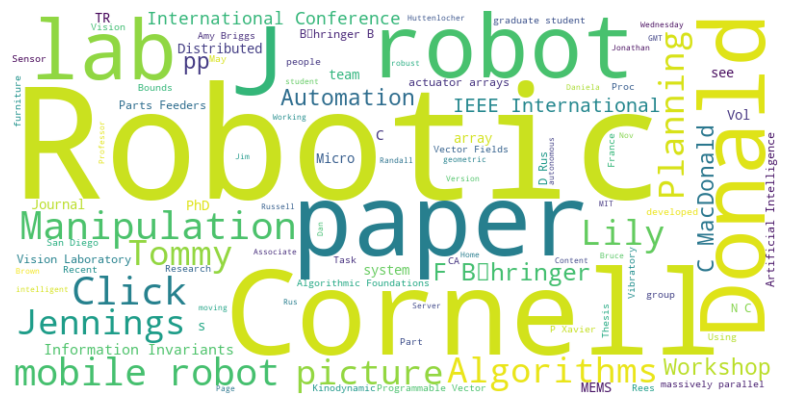

In [9]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# 定义一些自定义停用词（可选）
my_stopwords = {"the", "of", "by"}  # 例如

# 合并默认停用词和自定义停用词
stopwords = STOPWORDS.union(my_stopwords)

# 创建 WordCloud 对象
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color="white",
    stopwords=stopwords,         # 传入停用词
    max_words=100,               # 最多显示多少个词
    colormap='viridis'           # 颜色主题，可自行选择
).generate(text)

# 绘制词云
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  # 隐藏坐标轴
plt.show()

# 如果你想保存成图片
# wordcloud.to_file("wordcloud_output.png")
